## FRAM Assignment :
Group members : 
- Khush Bhuta (2022A7PS1333H)
- Daksh Jain (2022A7PS0201H)
- Rushi Patel (2022A7PS1382H)

### Task 1 - Asset Selection & Data Download
Financial Assets for the portfolio:
- Bharti Airtel (Large Cap)
- NIFTY 50 (Index)
- USD/INR (FX Rate)
- BASF (Small Cap)   
- Silver (Commodity)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
plt.style.use("default")
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define tickers
tickers = {
    "Bharti Airtel (Large Cap)": "BHARTIARTL.NS",
    "NIFTY 50 (Index)": "^NSEI",
    "USD/INR (FX Rate)": "INR=X",
    "BASF (Small Cap)": "BASF.NS",   
    "Silver (Commodity)": "SI=F"
}

# Define date range
start_date = "2019-05-11" #birthdate of Khush
end_date = "2024-06-29" # birthdate of Rushi

# Download adjusted close prices
data = yf.download(list(tickers.values()), start=start_date, end=end_date, auto_adjust=False)["Adj Close"]
data.columns = tickers.keys()

[*********************100%***********************]  5 of 5 completed


### Task 2 - Data Cleaning and Preprocessing
- Using Forward Fill (ffill) for missing values
- Calculate log returns
- Visualization using Line Charts and Histograms 

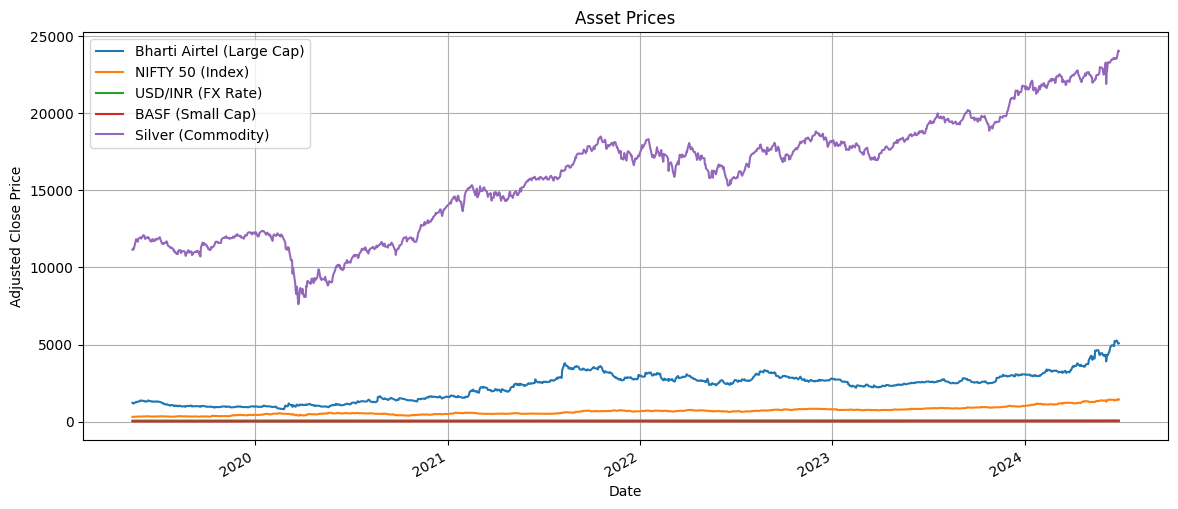

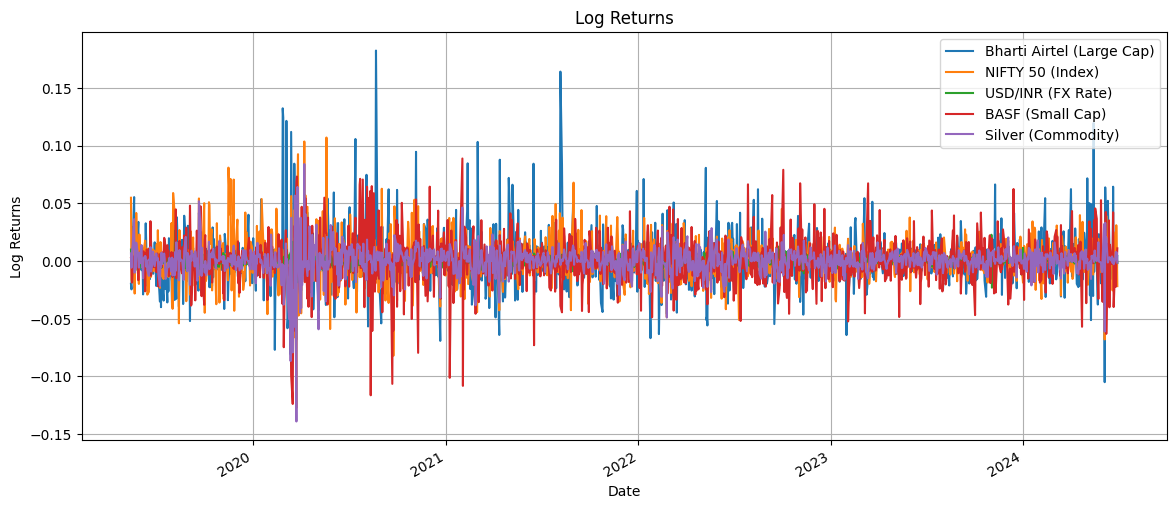

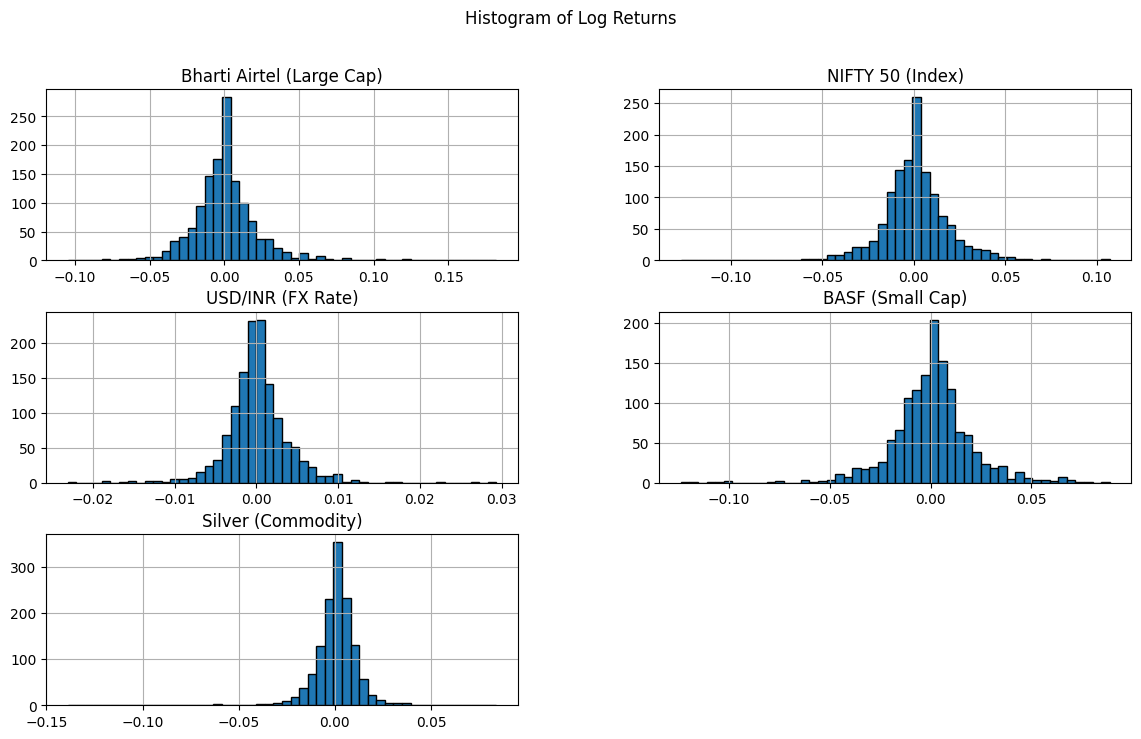

In [3]:
# Forward fill to handle missing values
data_ffill = data.ffill().dropna()

# Calculate daily log returns
returns = np.log(data_ffill / data_ffill.shift(1)).dropna()

# Plot price history
data_ffill.plot(figsize=(14, 6), title="Asset Prices")
plt.ylabel("Adjusted Close Price")
plt.grid(True)
plt.show()

# Plot return history
returns.plot(figsize=(14, 6), title="Log Returns")
plt.ylabel("Log Returns")
plt.grid(True)
plt.show()

# Plot histograms of returns
returns.hist(bins=50, figsize=(14, 8), edgecolor='black')
plt.suptitle("Histogram of Log Returns")
plt.show()

In [4]:
# merge all the returns into a single DataFrame
returns_df = pd.DataFrame(returns)
returns_df.columns = tickers.keys()
from scipy.stats import skew, kurtosis

data = returns_df.reset_index()
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Bharti Airtel (Large Cap),NIFTY 50 (Index),USD/INR (FX Rate),BASF (Small Cap),Silver (Commodity)
0,2019-05-14,-0.019827,0.054802,0.009883,0.002647,0.006603
1,2019-05-15,-0.024583,-0.016022,-0.004400,0.000000,-0.005813
2,2019-05-16,0.029363,-0.018433,-0.001392,-0.018679,0.008932
3,2019-05-17,0.009613,0.009944,0.000367,-0.009089,0.013241
4,2019-05-20,0.055354,0.034855,0.000662,0.004243,0.036250
...,...,...,...,...,...,...
1336,2024-06-24,0.015362,0.002645,-0.000468,-0.002844,0.001563
1337,2024-06-25,-0.011329,-0.003422,-0.001223,-0.022358,0.007764
1338,2024-06-26,-0.019742,0.031000,-0.000549,0.002494,0.006199
1339,2024-06-27,-0.010631,0.011106,0.001986,0.000311,0.007334


In [5]:
# Task 2 : Printing the summary statistics upto 2 decimal points
for col in returns_df.columns:
    print(f"Summary statistics for {col}:")
    print(f"Mean: {returns_df[col].mean():.5f}")
    print(f"Standard Deviation: {returns_df[col].std():.2f}")
    print(f"Skewness: {skew(returns_df[col]):.2f}")
    print(f"Kurtosis: {kurtosis(returns_df[col]):.2f}")
    print("-" * 50)

Summary statistics for Bharti Airtel (Large Cap):
Mean: 0.00106
Standard Deviation: 0.02
Skewness: 1.44
Kurtosis: 8.62
--------------------------------------------------
Summary statistics for NIFTY 50 (Index):
Mean: 0.00115
Standard Deviation: 0.02
Skewness: 0.24
Kurtosis: 5.01
--------------------------------------------------
Summary statistics for USD/INR (FX Rate):
Mean: 0.00013
Standard Deviation: 0.00
Skewness: 0.51
Kurtosis: 8.08
--------------------------------------------------
Summary statistics for BASF (Small Cap):
Mean: 0.00051
Standard Deviation: 0.02
Skewness: -0.44
Kurtosis: 5.02
--------------------------------------------------
Summary statistics for Silver (Commodity):
Mean: 0.00057
Standard Deviation: 0.01
Skewness: -1.66
Kurtosis: 22.38
--------------------------------------------------


In [6]:
# Task 3 - Performing Volatility estimation using Historical Volatility Method and GARCH-type models
portfolio_weights = np.array([0.2] * len(returns_df.columns))  # Equal weights for each asset
portfolio_returns = returns_df.dot(portfolio_weights)
portfolio_returns_df = pd.DataFrame(portfolio_returns, columns=["Portfolio Returns"])

# print the mean std skewness and kurtosis of the portfolio returns
print(f"Summary statistics for the portfolio:")
print(f"Mean: {portfolio_returns_df['Portfolio Returns'].mean():.5f}")
print(f"Standard Deviation: {portfolio_returns_df['Portfolio Returns'].std():.5f}")
print(f"Skewness: {skew(portfolio_returns_df['Portfolio Returns']):.2f}")
print(f"Kurtosis: {kurtosis(portfolio_returns_df['Portfolio Returns']):.2f}")
print("-" * 50)

portfolio_returns_df

Summary statistics for the portfolio:
Mean: 0.00069
Standard Deviation: 0.00925
Skewness: -0.62
Kurtosis: 7.20
--------------------------------------------------


,Portfolio Returns
Date,
2019-05-14,0.010822
2019-05-15,-0.010164
2019-05-16,-0.000042
2019-05-17,0.004815
2019-05-20,0.026273
...,...
2024-06-24,0.003251
2024-06-25,-0.006114
2024-06-26,0.003880


### Task 3 - Volatility Modeling and Forecasting
- Finding the best ARIMA Model by comparing BIC scores
- Testing for Heteroskedasticity using GARCH models
- Forecasting volatility for 30 days
- Interpretation of the output

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8746.718, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8748.059, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8748.098, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8746.103, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-8746.105, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-8744.113, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-8754.324, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-8752.072, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8752.295, Time=0.70 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-8752.439, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8754.224, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-8750.456, Time=1.51 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 5.213 seconds
                               SARIMAX Results                              

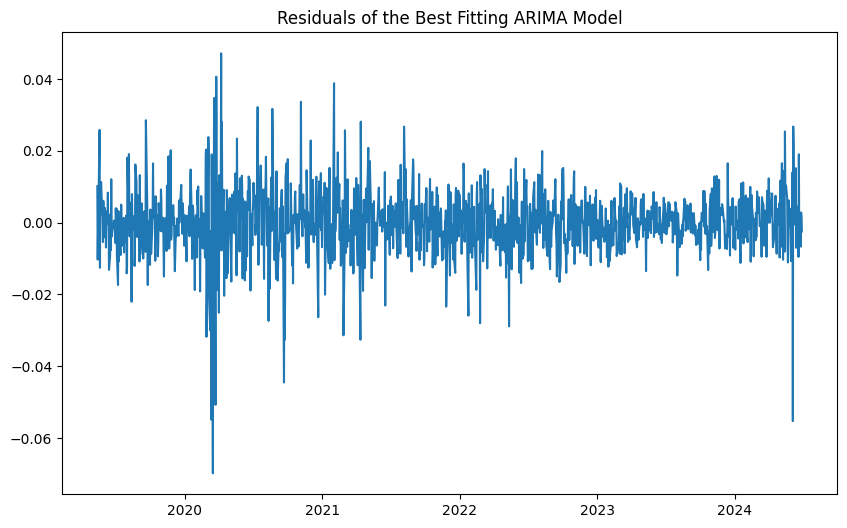

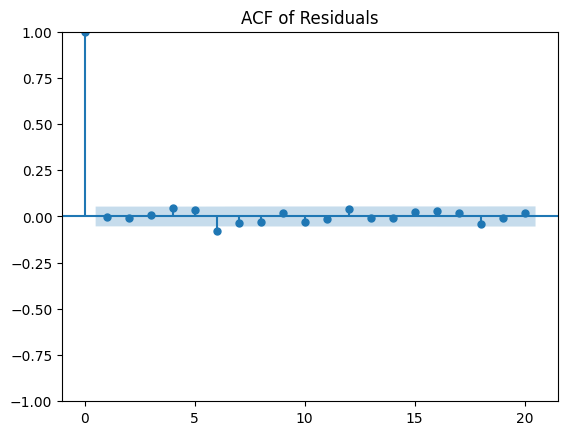

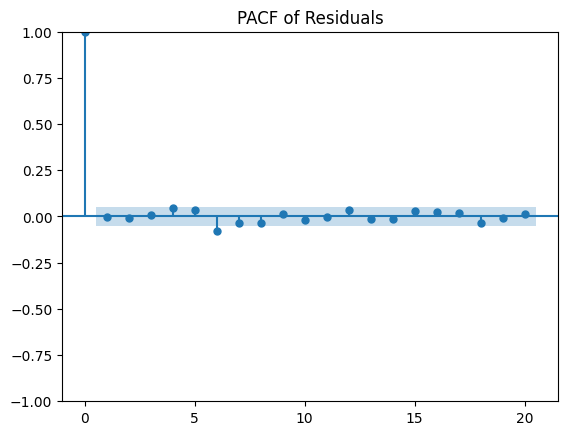

In [7]:
# Modeling the returns using ARIMA 
import pmdarima as pm

# Assuming 'data' and 'returns' are defined from the previous code
returns = portfolio_returns_df['Portfolio Returns'].dropna()

# Find best ARIMA model
arima_model = pm.auto_arima(returns, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=1,
                           start_P=0, seasonal=False,
                           d=None, D=0, trace=True,
                           error_action='ignore',  # we don't want to know if an order does not work
                           suppress_warnings=True,  # we don't want convergence warnings
                           stepwise=True)

# Print the model summary
print(arima_model.summary())

# Get the residuals
residuals = arima_model.resid()

# Analyze the residuals (e.g., plot them, check for autocorrelation)
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of the Best Fitting ARIMA Model")
plt.show()

# Further analysis on residuals (e.g., ACF, PACF plots)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=20)
plt.title("ACF of Residuals")
plt.show()

plot_pacf(residuals, lags=20)
plt.title("PACF of Residuals")
plt.show()

In [8]:
# performing tests for checking for hetersoskedasticity
import statsmodels.api as sm

# Assuming 'residuals' from the ARIMA model is available
# Perform the Breusch-Pagan test for heteroskedasticity
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, exog_het=sm.add_constant(np.arange(len(residuals))))

# Print the test results
print("\nBreusch-Pagan Test for Heteroskedasticity:")
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for label, value in zip(labels, bp_test):
    print(f"{label}: {value}")

# Interpretation
alpha = 0.05  # Significance level
if bp_test[1] < alpha:
    print("Reject the null hypothesis. Heteroskedasticity is present in the residuals.")
else:
    print("Fail to reject the null hypothesis. Heteroskedasticity is not present in the residuals.")


# Alternatively, you can use the Goldfeld-Quandt test
gq_test = sm.stats.diagnostic.het_goldfeldquandt(residuals, x=sm.add_constant(np.arange(len(residuals))))

print("\nGoldfeld-Quandt Test for Heteroskedasticity:")
print(f"F-statistic: {gq_test[0]}")
print(f"p-value: {gq_test[1]}")

if gq_test[1] < alpha:
  print("Reject the null hypothesis. Heteroskedasticity is present in the residuals.")
else:
  print("Fail to reject the null hypothesis. Heteroskedasticity is not present in the residuals.")


Breusch-Pagan Test for Heteroskedasticity:
Lagrange multiplier statistic: 23.251292203217382
p-value: 1.4215490250112653e-06
f-value: 23.62626506548571
f p-value: 1.3079329411730022e-06
Reject the null hypothesis. Heteroskedasticity is present in the residuals.

Goldfeld-Quandt Test for Heteroskedasticity:
F-statistic: 0.42526021152890714
p-value: 0.9999999999999999
Fail to reject the null hypothesis. Heteroskedasticity is not present in the residuals.


In [9]:
# Assuming 'residuals' from the ARIMA model is available
# Perform the ARCH test for conditional heteroskedasticity
arch_test = sm.stats.diagnostic.acorr_ljungbox(residuals**2, lags=[10], return_df=True) # Test on squared residuals

# Print the test results
print("\nARCH Test for Conditional Heteroskedasticity (Ljung-Box test on squared residuals):")
print(arch_test)

# Interpretation
alpha = 0.05  # Significance level
if arch_test['lb_pvalue'][10] < alpha:
    print("Reject the null hypothesis. Conditional heteroskedasticity is present in the residuals.")
else:
    print("Fail to reject the null hypothesis. Conditional heteroskedasticity is not present in the residuals.")


ARCH Test for Conditional Heteroskedasticity (Ljung-Box test on squared residuals):
      lb_stat      lb_pvalue
10  737.70401  5.029554e-152
Reject the null hypothesis. Conditional heteroskedasticity is present in the residuals.


- According to the Breusch-Pagan test and ARCH Test (Ljung-Box), conditional heteroskedasticity is present in the time-series
- This indicates that a GARCH model (E-GARCH) has to be used to remove the conditional heteroskedasticity, and then check the residuals

In [10]:
import arch

# Assuming 'residuals' from the ARIMA model is available
# Fit different GARCH models
garch_models = {
    'Standard GARCH': arch.arch_model(residuals, vol='Garch', p=1, q=1),
    'EGARCH': arch.arch_model(residuals, vol='EGARCH', p=1, o=1, q=1),
    'GJR-GARCH': arch.arch_model(residuals, vol='GARCH', p=1, o=1, q=1),  # GJR is a special case of GARCH
    'APARCH': arch.arch_model(residuals, vol='APARCH', p=1, o=1, q=1),
    'FIGARCH': arch.arch_model(residuals, vol='FIGARCH', p=1, o=1, q=1)
}

results = {}
for name, model in garch_models.items():
    try:
        results[name] = model.fit(disp='off')  # Fit the model (suppress output)
        print(f"Successfully fit {name}")
    except Exception as e:
        print(f"Error fitting {name}: {e}")

# Compare AIC/BIC to find the best fitting model
best_model_name = None
best_aic = float('inf')
best_bic = float('inf')

for name, result in results.items():
    if result.aic < best_aic:
        best_aic = result.aic
        best_model_name = name
    if result.bic < best_bic:
        best_bic = result.bic
for name, result in results.items():
    print(f"{name}: AIC = {result.aic:.2f}, BIC = {result.bic:.2f}")
print(f"Best Model (by AIC): {best_model_name}")


# Get residuals from the best GARCH model
if best_model_name in results:
    best_model_result = results[best_model_name]
    best_garch_residuals = best_model_result.std_resid
else:
    print("Best model not found in results!")
    best_garch_residuals = None
    
# print(results)

Successfully fit Standard GARCH
Successfully fit EGARCH
Successfully fit GJR-GARCH
Successfully fit APARCH
Successfully fit FIGARCH
Standard GARCH: AIC = -519.22, BIC = -498.41
EGARCH: AIC = -9074.99, BIC = -9048.98
GJR-GARCH: AIC = -9060.70, BIC = -9034.70
APARCH: AIC = -9059.31, BIC = -9028.10
FIGARCH: AIC = -9063.38, BIC = -9037.37
Best Model (by AIC): EGARCH


In [11]:
forecast_horizon = 30
num_simulations = 1000

# 1) Run a simulation‑based forecast
fc = best_model_result.forecast(
    horizon=forecast_horizon,
    method='simulation',
    simulations=num_simulations
)

# fc.simulations is an (horizon × simulations) array of returns
simulated_returns = fc.simulations.values*np.sqrt(252)
# for daily volatility, we simply use the fc.simulations.values  

# 2) Compute daily vol as the std‑dev across the simulation axis
volatility_forecast = simulated_returns.std(axis=1)
volatility_forecast = volatility_forecast.ravel()

# 3) Put into a DataFrame for easy viewing
volatility_forecast_df = pd.DataFrame({
    "Day": np.arange(1, forecast_horizon + 1),
    "Volatility Forecast": volatility_forecast
})

print("\nAnnual volatility Forecast for the Next 30 Days:")
volatility_forecast_df.set_index("Day", inplace=True)
volatility_forecast_df


Annual volatility Forecast for the Next 30 Days:


,Volatility Forecast
Day,
1,0.156584
2,0.153655
3,0.148255
4,0.157073
5,0.157978
6,0.153258
7,0.161263
8,0.165692
9,0.159282


### Task 4 : Value at Risk (VaR) Estimation
- 1-day and 10-day VaR estimation using all 3 methods
- Interpretations and Assumptions

In [12]:
VaR_results = pd.DataFrame(columns=["Simulation Method","VaR_95_1_day", "VaR_99_1_day", "VaR_95_10_day", "VaR_99_10_day"])

In [13]:
# Task 4 - VaR Estimation using 3 methods


# HISTORICAL SIMULATION METHOD
def compute_var_bootstrap(returns, confidence_level, num_simulations=1000):
    var_values = []
    for _ in range(num_simulations):
        # Perform bootstrapping by resampling returns with replacement
        bootstrapped_returns = np.random.choice(returns, size=len(returns), replace=True)

        # Sort the bootstrapped returns
        sorted_returns = np.sort(bootstrapped_returns)

        # Calculate the index corresponding to the desired quantile
        index = int(len(sorted_returns) * (1 - confidence_level))

        # Extract the VaR at the specified confidence level
        var = -sorted_returns[index]
        var_values.append(var)

    # Calculate the mean VaR and the 95% confidence interval
    mean_var = np.mean(var_values)
    lower_bound = np.percentile(var_values, 2.5)
    upper_bound = np.percentile(var_values, 97.5)

    return mean_var, lower_bound, upper_bound

# Compute VaR at 95% and 99% confidence levels
var_95_mean, var_95_lower, var_95_upper = compute_var_bootstrap(returns, 0.95)
var_99_mean, var_99_lower, var_99_upper = compute_var_bootstrap(returns, 0.99)


print(f"95% VaR (Mean) - (one-day) - Historical Simulation: {var_95_mean:.4f}")
print(f"95% VaR (Mean) - (ten-day) - Historical Simulation: {var_95_mean*np.sqrt(10):.4f}")
# print(f"95% VaR Confidence Interval: ({var_95_lower:.4f}, {var_95_upper:.4f})")
print(f"99% VaR (Mean) - (one-day) - Historical Simulation: {var_99_mean:.4f}")
print(f"95% VaR (Mean) - (ten-day) - Historical Simulation: {var_99_mean*np.sqrt(10):.4f}")
# print(f"99% VaR Confidence Interval: ({var_99_lower:.4f}, {var_99_upper:.4f})")
VaR_results = pd.concat([VaR_results, pd.DataFrame([{"Simulation Method": "Historical Simulation", "VaR_95_1_day": var_95_mean, "VaR_99_1_day": var_99_mean,"VaR_95_10_day": var_95_mean*np.sqrt(10), "VaR_99_10_day": var_99_mean*np.sqrt(10)}])], ignore_index=True)


95% VaR (Mean) - (one-day) - Historical Simulation: 0.0122
95% VaR (Mean) - (ten-day) - Historical Simulation: 0.0387
99% VaR (Mean) - (one-day) - Historical Simulation: 0.0264
95% VaR (Mean) - (ten-day) - Historical Simulation: 0.0835


In [14]:
# USING VARIANCE-COVARIANCE VAR METHOD

from scipy import stats

def parametric_var(returns, confidence_level, lookback_period=252):
    """
    Computes Parametric Value at Risk (VaR) using the variance-covariance method.

    Args:
        returns (pd.Series): A pandas Series of historical returns.
        confidence_level (float): The desired confidence level for VaR (e.g., 0.95 for 95% VaR).
        lookback_period (int): The number of past returns to use for estimation.

    Returns:
        float: The calculated VaR value.
    """
    # Calculate the mean and standard deviation of returns over the lookback period.
    mean_return = returns.tail(lookback_period).mean()
    std_dev_return = returns.tail(lookback_period).std()

    # Calculate the z-score corresponding to the confidence level.
    z_score = np.abs(stats.norm.ppf(1 - confidence_level))

    # Calculate VaR using the formula: VaR = mean_return - z_score * std_dev_return
    var = -(mean_return - z_score * std_dev_return)

    return var

# Example usage with your existing returns data:
# Assuming 'returns' is a pandas Series of your daily returns
confidence_level = 0.95  # 95% confidence level
var_95 = parametric_var(returns, confidence_level)
print(f"{confidence_level*100:.0f}% Parametric VaR (one-day): {var_95:.4f}")
print(f"{confidence_level*100:.0f}% Parametric VaR (ten-day): {var_95*np.sqrt(10):.4f}")
# For 99% confidence level
confidence_level = 0.99
var_99 = parametric_var(returns, confidence_level)
print(f"{confidence_level*100:.0f}% Parametric VaR (one-day): {var_99:.4f}")
print(f"{confidence_level*100:.0f}% Parametric VaR (teb-day): {var_99*np.sqrt(10):.4f}")
VaR_results = pd.concat([VaR_results, pd.DataFrame([{"Simulation Method": "Parametric VaR", "VaR_95_1_day": var_95, "VaR_99_1_day": var_99,"VaR_95_10_day": var_95*np.sqrt(10), "VaR_99_10_day": var_99*np.sqrt(10)}])], ignore_index=True)


95% Parametric VaR (one-day): 0.0110
95% Parametric VaR (ten-day): 0.0349
99% Parametric VaR (one-day): 0.0161
99% Parametric VaR (teb-day): 0.0511


In [15]:
# MONTE - CARLO SIMULATIONS METHOD

# find the best fitting distribution
import scipy.stats as st
from scipy.stats import genextreme as gev, genpareto as gpd

def fit_distributions(returns, distributions):
    results = {}
    for distribution_name in distributions:
        try:
            distribution = getattr(st, distribution_name)
            params = distribution.fit(returns)
            results[distribution_name] = {
                'distribution': distribution,
                'params': params,
                'AIC': distribution.nnlf(params, returns) + 2 * len(params),  # AIC
                'BIC': distribution.nnlf(params, returns) + len(params) * np.log(len(returns))  # BIC
            }
        except Exception as e:
            print(f"Error fitting {distribution_name}: {e}")
            continue

    return results

def compare_distributions(results):
    best_distribution = None
    best_aic = float('inf')
    best_bic = float('inf')  # Initialize best_bic to infinity
    for name, result in results.items():
        if result['AIC'] < best_aic:
            best_aic = result['AIC']
            best_distribution = name
        if result['BIC'] < best_bic:  # Compare BIC as well
            best_bic = result['BIC']

    print(f"\nComparison of Distribution Fits:")
    for name, result in results.items():
        print(f"{name}: AIC = {result['AIC']:.2f}, BIC = {result['BIC']:.2f}")  # Print both AIC and BIC
    print(f"Best Distribution by AIC: {best_distribution}")  # Explicitly print by AIC

    # Return AIC and BIC of the best distribution for clarity
    return best_distribution, results[best_distribution]['AIC'], results[best_distribution]['BIC']

# Step 2: Define Distributions to Fit
distributions = [
    'norm', 't', 'cauchy', 'laplace', 'logistic',
    'gumbel_r', 'gumbel_l', 'hypsecant', 'gennorm', 'skewnorm',
    'johnsonsu', 'johnsonsb'
]
distributions.extend(['genextreme', 'genpareto'])  # Add GEV and GPD

# Fit distributions
fitted_distributions = fit_distributions(returns, distributions)
best_dist, best_aic, best_bic = compare_distributions(fitted_distributions)

print(f"\nBest Distribution (AIC): {best_dist}, AIC={best_aic:.2f}, BIC={best_bic:.2f}") # Displaying the best distribution


Comparison of Distribution Fits:
norm: AIC = -4374.04, BIC = -4363.63
t: AIC = -4513.92, BIC = -4498.31
cauchy: AIC = -4393.00, BIC = -4382.60
laplace: AIC = -4503.60, BIC = -4493.20
logistic: AIC = -4486.45, BIC = -4476.05
gumbel_r: AIC = -3892.14, BIC = -3881.73
gumbel_l: AIC = -4167.64, BIC = -4157.24
hypsecant: AIC = -4501.99, BIC = -4491.59
gennorm: AIC = -4501.65, BIC = -4486.05
skewnorm: AIC = -4385.00, BIC = -4369.39
johnsonsu: AIC = -4511.10, BIC = -4490.30
johnsonsb: AIC = -4369.99, BIC = -4349.18
genextreme: AIC = -2309.88, BIC = -2294.28
genpareto: AIC = -2846.32, BIC = -2830.72
Best Distribution by AIC: t

Best Distribution (AIC): t, AIC=-4513.92, BIC=-4498.31


In [16]:
import numpy as np
from scipy.stats import t

def monte_carlo_var(returns, confidence_level, num_simulations=10000, best_dist='t', dist_params=None):
    if best_dist == 't':
        if dist_params is None:
            raise ValueError("Distribution parameters are required for t-distribution")
        df, loc, scale = dist_params  # Extract t-distribution parameters
        simulated_returns = t.rvs(df, loc=loc, scale=scale, size=num_simulations)
    else:
        raise ValueError("Unsupported distribution")

    var = -np.percentile(simulated_returns, 100 * (1 - confidence_level))
    return var

# Example: Access parameters for the t-distribution (replace 't' with your best_dist if different)
if 't' in fitted_distributions:
  t_params = fitted_distributions['t']['params']
  var_95 = monte_carlo_var(returns, 0.95, best_dist='t', dist_params=t_params)
  var_99 = monte_carlo_var(returns, 0.99, best_dist='t', dist_params=t_params)
  print(f"95% VaR (Monte Carlo, t-distribution): {var_95:.4f}")
  print(f"95% VaR (Monte Carlo, t-distribution): {var_95*np.sqrt(10):.4f}")
  print(f"95% VaR (Monte Carlo, t-distribution): {var_99:.4f}")
  print(f"99% VaR (Monte Carlo, t-distribution): {var_99*np.sqrt(10):.4f}")
else:
  print("t distribution not found in fitted distributions")

VaR_results = pd.concat([VaR_results, pd.DataFrame([{"Simulation Method": "Monte-Carlo Simulation", "VaR_95_1_day": var_95, "VaR_99_1_day": var_99,"VaR_95_10_day": var_95*np.sqrt(10), "VaR_99_10_day": var_99*np.sqrt(10)}])], ignore_index=True)

95% VaR (Monte Carlo, t-distribution): 0.0129
95% VaR (Monte Carlo, t-distribution): 0.0408
95% VaR (Monte Carlo, t-distribution): 0.0242
99% VaR (Monte Carlo, t-distribution): 0.0767


In [17]:
VaR_results

,Simulation Method,VaR_95_1_day,VaR_99_1_day,VaR_95_10_day,VaR_99_10_day
0,Historical Simulation,0.012243,0.026405,0.038715,0.083500
1,Parametric VaR,0.011044,0.016144,0.034924,0.051052
2,Monte-Carlo Simulation,0.012917,0.024241,0.040847,0.076657


#### The above results indicate the following : 
- 99% VaR > 95% always for the same method since it gives a more risk-sensitive estimate
- Parametric VaR method underpredicts the 1-day and 10-day VaR values since Normal Distribution is not the best fit
- Hisstorical simulation gives VaR estimates that are close to the Monte-Carlo approach, but overpredict the 99% VaR 

### Task 5 - Backtesting and Model Validation


In [18]:
from scipy.stats import t, norm, chi2
from statsmodels.stats.diagnostic import acorr_ljungbox

def kupiec_test(violations: int, total_obs: int, p_exceed: float) -> float:
    """
    Kupiec POF test (proportion of failures).
    
    violations   = number of observed exceptions (x)
    total_obs    = number of VaR forecasts (T)
    p_exceed     = expected exception probability (e.g. 0.05 for 95% VaR)
    
    Returns the p‑value of LR = -2[ log L0 – log L1 ] ~ χ²(1).
    """
    x, T = violations, total_obs
    # avoid log(0) by handling edge cases
    term1 = x * np.log(p_exceed / (x / T))             if x > 0 else 0
    term2 = (T - x) * np.log((1 - p_exceed) / ((T - x) / T)) if T - x > 0 else 0
    LR = -2 * (term1 + term2)
    p_value = 1 - chi2.cdf(LR, df=1)
    return round(p_value, 5)


def christoffersen_test(actual_violations, alpha=0.05):
    """
    Christoffersen test for VaR model accuracy.  Checks for independence of violations.

    Args:
        actual_violations: A series of 1s (violations) and 0s (no violations)
        alpha: Significance level.

    Returns:
        p_value: p-value of the test.
    """
    # Calculate the number of violations
    num_violations = actual_violations.sum()

    # Perform Ljung-Box test on indicator series
    test_result = acorr_ljungbox(actual_violations, lags=1, return_df=True)  # Lag of 1 is sufficient for this test
    p_value = test_result['lb_pvalue'][1]
    return p_value

In [19]:
# calculate the number of violations 
# print the acceptable number of violations according to var_95 and var_99
print(f"Acceptable number of violations for 95% VaR: {len(portfolio_returns_df) * 0.05:.2f}")
print(f"Acceptable number of violations for 99% VaR: {len(portfolio_returns_df) * 0.01:.2f}")
violations = (portfolio_returns_df['Portfolio Returns'] < -var_99).astype(int)  # Assuming var_99 is the VaR threshold
violations_ind = violations.astype(int)  # Convert violations to integers for statistical tests
print('Total number of violations:', violations.sum()) 

# Kupiec POF test
p_val_k = kupiec_test(violations.sum(), len(violations), 0.05)
print(f"Kupiec Test p‑value: {p_val_k}")
if(p_val_k < 0.05):
    print("Reject the null hypothesis. Too many violations. The model understates/overstates risk.")
else:
    print("Fail to reject the null hypothesis. Actual number of violations is consistent with expected VaR model.")
# Christoffersen test
p_val_c = christoffersen_test(violations_ind)
print(f"Christoffersen Test p-value: {p_val_c.round(5)}")
if(p_val_c < 0.05):
    print("Reject the null hypothesis. The violations are not independent.")
else:
    print("Fail to reject the null hypothesis. The violations are independent.")

Acceptable number of violations for 95% VaR: 67.05
Acceptable number of violations for 99% VaR: 13.41
Total number of violations: 17
Kupiec Test p‑value: 0.0
Reject the null hypothesis. Too many violations. The model understates/overstates risk.
Christoffersen Test p-value: 0.63759
Fail to reject the null hypothesis. The violations are independent.


In [20]:
import statsmodels.api as sm
import numpy as np

# Assuming 'residuals' from the ARIMA model is available
# Perform the ARCH test for conditional heteroskedasticity
arch_test = sm.stats.diagnostic.acorr_ljungbox(residuals**2, lags=[10], return_df=True) # Test on squared residuals

# Print the test results
print("\nARCH Test for Conditional Heteroskedasticity (Ljung-Box test on squared residuals):")
print(arch_test)

# Interpretation
alpha = 0.05  # Significance level
if arch_test['lb_pvalue'][10] < alpha:
    print("Reject the null hypothesis. Conditional heteroskedasticity is present in the residuals.")
else:
    print("Fail to reject the null hypothesis. Conditional heteroskedasticity is not present in the residuals.")


ARCH Test for Conditional Heteroskedasticity (Ljung-Box test on squared residuals):
      lb_stat      lb_pvalue
10  737.70401  5.029554e-152
Reject the null hypothesis. Conditional heteroskedasticity is present in the residuals.


In [21]:
import yfinance as yf
import numpy as np
import pandas as pd
# Task 6 - Option Pricing & Greek Sensitivities
ticker = 'RELIANCE.NS'  
# simulate GBM paths for Last Thursday 24/04/25 from 1/01/2024 to 24/04/2025
start_date = '2025-04-01'
end_date = '2025-04-22'
# use these paths to compute European call/put option prices and Greeks
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)["Adj Close"]
data = data.ffill().dropna()
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'])
data

[*********************100%***********************]  1 of 1 completed


Ticker,Date,RELIANCE.NS
0,2025-04-01,1252.599976
1,2025-04-02,1251.150024
2,2025-04-03,1248.699951
3,2025-04-04,1204.699951
4,2025-04-07,1165.699951
5,2025-04-08,1182.199951
6,2025-04-09,1185.349976
7,2025-04-11,1218.949951
8,2025-04-15,1240.099976
9,2025-04-16,1239.300049


### Task 6 : (Option Pricing and Greek Sensitivities)
- Simulated the GBM Stock Prices for RELIANCE.NS (10,000 simulations) - for Last Thursday of April
- Used GBM paths to compute Call/Put option prices
- Estimate Delta (finite differences), Gamma, Vega, Theta
- Compare the greeks for different strike prices (K) and Maturities (T)

In [22]:
import random
import math
def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N  # Time step
    prices = [S0]  # List to store the stock prices, starting with the initial price
    for i in range(1, N):
        Z = random.gauss(0, 1)  # Generate a random number from a standard normal distribution
        price = prices[i-1] * math.exp((mu - 0.5 * sigma**2) * dt + sigma * math.sqrt(dt) * Z)
        prices.append(price)
    return prices

# Function to simulate multiple paths
def simulate_multiple_paths(S0, mu, sigma, T, N, M):
    all_prices = []  # List to store multiple simulated paths
    for i in range(M):
        all_prices.append(simulate_gbm(S0, mu, sigma, T, N))  # Simulate each path
    return all_prices

# Function to visualize the simulated stock price paths
def plot_simulation_paths(all_prices):
    plt.figure(figsize=(10, 6))
    for path in all_prices:
        plt.plot(path, color='blue', alpha=0.1)  # Simulate multiple paths
    plt.title('SIMULATED GBM PATHS FOR RELIANCE')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.show()

In [23]:
stock_data = yf.download('RELIANCE.NS', start=start_date, end=end_date, auto_adjust=False)["Adj Close"]
S0 = 1252.6 # 1/04/2025 Stock Price
returns = np.log(stock_data / stock_data.shift(1)).dropna()
mean_returns_reliance = returns.mean()*252
print("Mean Returns : ",mean_returns_reliance)
mean_std_reliance = returns.std()*np.sqrt(252)
print("Standard Deviation : ",mean_std_reliance) 

[*********************100%***********************]  1 of 1 completed

Mean Returns :  Ticker
RELIANCE.NS    0.771472
dtype: float64
Standard Deviation :  Ticker
RELIANCE.NS    0.34068
dtype: float64


In [24]:

# GBM path simulator for stock
def simulate_gbm_paths(S0, mu, sigma, T, N, M, seed=None):
    """
    Simulate M GBM paths, each with N time-steps, over total horizon T (in years).
    Returns an (M, N+1) array of prices including S0 at t=0.
    """
    dt = T / N
    if seed is not None:
        np.random.seed(seed)
    # Standard normals: shape (M, N)
    Z = np.random.normal(size=(M, N))
    # Pre-allocate and set initial prices
    S = np.zeros((M, N+1))
    S[:, 0] = S0
    # Step forward
    for t in range(1, N+1):
        S[:, t] = S[:, t-1] * np.exp((mu - 0.5*sigma**2)*dt
                                       + sigma * np.sqrt(dt) * Z[:, t-1])
    return S
# Finding option prices
def price_european_call(S_paths, K, r, T):
    payoffs = np.maximum(S_paths[:, -1] - K, 0)
    return np.exp(-r * T) * np.mean(payoffs)
def price_european_put(S_paths, K, r, T):
    payoffs = np.maximum(K-S_paths[:,-1],0)
    return np.exp(-r * T) * np.mean(payoffs)
# Option Greeks
def delta_fd(base_price_fn, bump):
    C0_call, _ = base_price_fn()
    C_plus_call, _ = base_price_fn(S0_bump=+bump)
    return (C_plus_call - C0_call) / bump

def gamma_fd(base_price_fn, bump):
    C_minus,_ = base_price_fn(S0_bump=-bump)
    C0_call,_      = base_price_fn()
    C_plus,_  = base_price_fn(S0_bump=+bump)
    return (C_plus - 2*C0_call + C_minus) / bump**2

def vega_fd(base_price_fn, bump):
    C_plus,_  = base_price_fn(sigma_bump=+bump)
    C_minus,_ = base_price_fn(sigma_bump=-bump)
    return (C_plus - C_minus) / (2*bump)

def theta_fd(base_price_fn, dt):
    # Theta ≈ (C(T - dt) - C(T)) / dt
    C_now,_    = base_price_fn()
    C_earlier,_ = base_price_fn(T_bump=-dt)
    return (C_earlier - C_now) / dt

def make_pricer(S0, mu, sigma, r, K, T, N, M, seed=42):
    def pricer(S0_bump=0.0, sigma_bump=0.0, T_bump=0.0):
        # adjust parameters
        S0_adj   = S0   + S0_bump
        sigma_adj= sigma+ sigma_bump
        T_adj    = T    + T_bump
        # If T changes, adjust N accordingly so dt=1/252
        N_adj    = int(np.round(T_adj * 252))
        paths = simulate_gbm_paths(S0_adj, mu, sigma_adj, T_adj, N_adj, M, seed)
        return price_european_call(paths, K, r, T_adj), price_european_put(paths, K, r, T_adj)
    return pricer

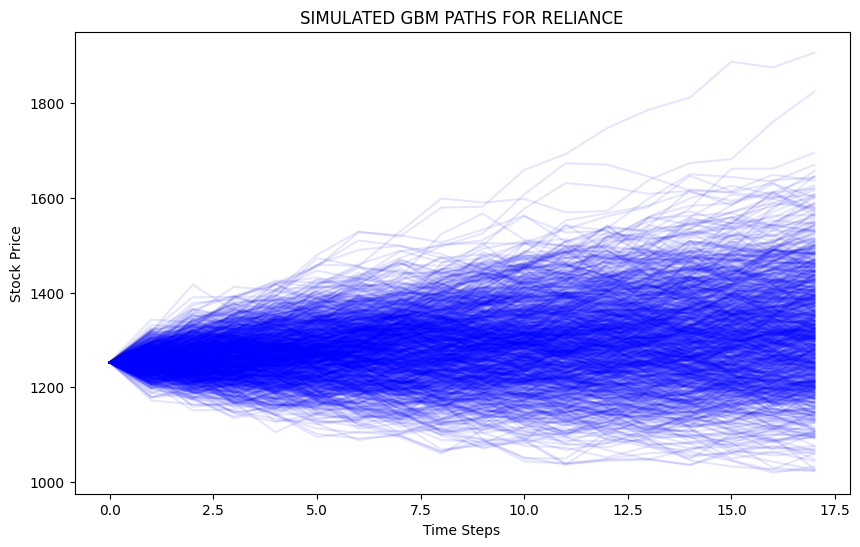

In [25]:
if __name__ == "__main__":
    
    mu = 0.771472             # mean returns (drift)
    sigma = 0.34068           # using mean standard deviation
    S0    = 1252.6            # stock price on 1-Apr-2025
    r     = 0.06              # annual risk-free rate
    # 18 trading days from 1 Apr to 24 Apr => T_full = 18/252
    N_full = 18
    T_full = N_full / 252
    M = 1000 # number of paths
    
    simulated_paths = simulate_multiple_paths(S0, mu, sigma, T_full, N_full, M)
    plot_simulation_paths(simulated_paths)
    
    # Strikes: 90%, 100%, 110% (for comparison across different strike prices)
    strikes = [0.9*S0, S0, 1.1*S0]

    # Maturities (for comparison across different maturities)
    maturity_steps = [N_full//3, 2*(N_full//3), N_full]
    maturities     = [n/252 for n in maturity_steps]

    seed = 42   # for reproducibility

    # Collect results
    results = []

    for T, step in zip(maturities, maturity_steps):
        N = step
        dt = 1/252
        for K in strikes:
            # Create a pricer closure for this (K, T)
            pricer = make_pricer(S0, mu, sigma, r, K, T, N, M, seed)

            # Base price
            C0_call, C0_put = pricer()

            # Greeks
            dS    = S0 * 1e-2     # 1% bump
            dsig  = sigma * 1e-2  # 1% vol bump
            Δ     = delta_fd(pricer, dS)
            Γ     = gamma_fd(pricer, dS)
            Vega  = vega_fd(pricer, dsig)
            Θ     = theta_fd(pricer, dt)

            results.append({
                'Maturity (days)':   N,
                'Strike':            K,
                'Price (Call)':             C0_call,
                'Price (Put)':              C0_put,
                'Delta':             Δ,
                'Gamma':             Γ,
                'Vega':              Vega,
                'Theta':             Θ,
            })

In [26]:
# Print a summary table
print("\n Option Prices and Greeks:")
print("\n Strike Prices used = [1127.34, 1252.60, 1377.86]")
print("\n Maturity Days = [6, 12, 18]")
df = pd.DataFrame(results)
df


 Option Prices and Greeks:

 Strike Prices used = [1127.34, 1252.60, 1377.86]

 Maturity Days = [6, 12, 18]


,Maturity (days),Strike,Price (Call),Price (Put),Delta,Gamma,Vega,Theta
0,6,1127.34,147.829546,0.166833,1.009028,0.000196,2.505796,-632.776336
1,6,1252.60,38.243962,15.662434,0.700626,0.007493,69.195025,-695.713242
2,6,1377.86,2.067405,104.567062,0.081268,0.001759,24.960765,-232.048675
3,12,1127.34,170.158326,0.820832,1.012757,0.000659,6.886502,-857.113592
4,12,1252.60,62.330874,17.896005,0.748181,0.003746,87.242865,-840.290463
5,12,1377.86,10.644945,91.112701,0.244643,0.003542,77.542592,-568.971314
6,18,1127.34,198.954121,1.340832,1.027028,0.000654,27.874127,-1307.598617
7,18,1252.60,91.279613,18.390644,0.811491,0.002776,113.672165,-1435.674802
8,18,1377.86,26.511928,78.347279,0.394205,0.004695,130.097915,-839.544383


### Task 7 : Hedging Strategy Implementation
- Used the Delta-Neutral strategy to rebalance the portfolio weights dynamically across the period of 5 years
- Assumed initial weights to be equal (0.2 for 5 instruments = 1.0)
- Delta for Stocks and NIFTY = 1
- Delta for Exchange Rate = -1
- Delta for Commodity = 0.5 
- Displayed the summary statistics for the Delta-Neutral Portfolio
Normalized Portfolio delta is hence - 0.5 ((1 + 1 - 1 + 1 + 0.5)/5)

Date: 2019-05-14 00:00:00
Old Weights: [0.2 0.2 0.2 0.2 0.2]
New Weights: [1.58195323e-16 5.00000000e-01 5.00000000e-01 3.68943535e-16
 0.00000000e+00]
Old Portfolio Delta: 0.50000
New Portfolio Delta: 0.00000
--------------------------------------------------
Date: 2019-05-15 00:00:00
Old Weights: [0.2 0.2 0.2 0.2 0.2]
New Weights: [3.70244373e-16 5.15392105e-17 5.00000000e-01 5.00000000e-01
 0.00000000e+00]
Old Portfolio Delta: 0.50000
New Portfolio Delta: 0.00000
--------------------------------------------------
Date: 2019-05-16 00:00:00
Old Weights: [0.2 0.2 0.2 0.2 0.2]
New Weights: [5.00000000e-01 3.46944695e-18 5.00000000e-01 8.45677695e-17
 2.77555756e-17]
Old Portfolio Delta: 0.50000
New Portfolio Delta: -0.00000
--------------------------------------------------
Date: 2019-05-17 00:00:00
Old Weights: [0.2 0.2 0.2 0.2 0.2]
New Weights: [0.         0.         0.33333333 0.         0.66666667]
Old Portfolio Delta: 0.50000
New Portfolio Delta: 0.00000
---------------------------

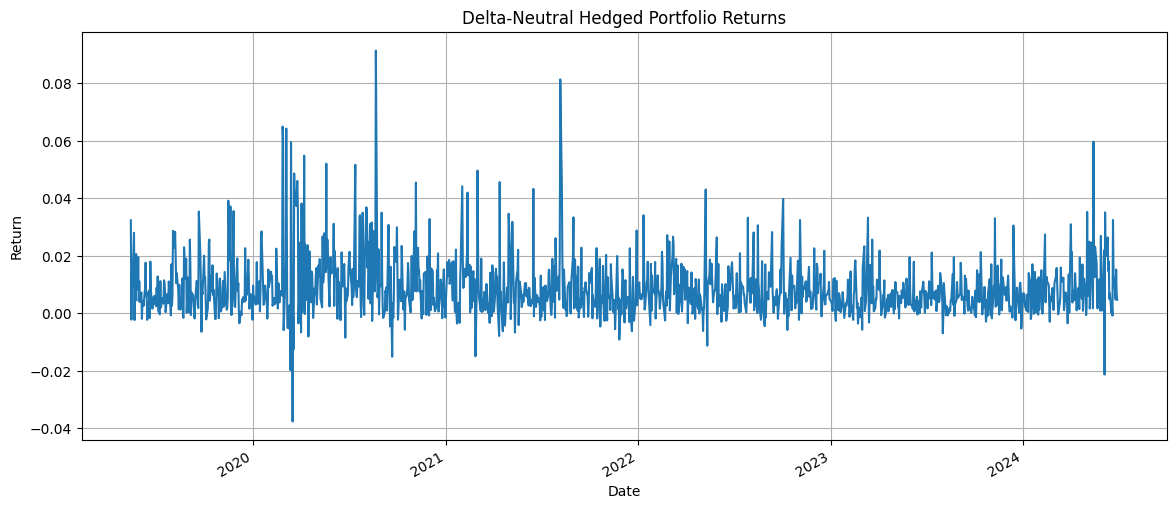

Summary Statistics of Delta-Neutral Hedged Portfolio:
Mean: 0.00879
Std Dev: 0.01024
Skewness: 2.04
Kurtosis: 9.00


In [27]:
# Task - 7 Implementing Hedging Strategies - DELTA - NEUTRAL PORTFOLIO

# Bharti Airtel, NIFTY 50, USD/INR, Small Cap, Silver
delta_vector = np.array([1, 1, -1, 1, 0.5])  

# Normalize the delta exposures so they represent relative sensitivities
normalized_delta = delta_vector / np.sum(np.abs(delta_vector))

# Prepare a container for rebalanced weights
rebalanced_weights = []

# For each day, solve for weights such that portfolio delta ≈ 0
# Use constraint: sum(weights * delta_vector) = 0 and sum(weights) = 1
from scipy.optimize import minimize

dates = returns_df.index
for i in range(len(dates)):
    def objective(w):
        return -returns_df.iloc[i].dot(w)  # maximize return

    # Constraint: delta-neutral
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.dot(w, delta_vector)},   # delta-neutral constraint
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}            # fully invested portfolio
    ]
    
    bounds = [(0, 1)] * len(delta_vector)  # no shorting
    initial_guess = np.array([1/5.0] * 5)

    result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)
    
    if result.success:
        rebalanced_weights.append(result.x)
    else:
        # fallback: use equal weights if optimizer fails
        rebalanced_weights.append(initial_guess)
    
    # Calculate old and new portfolio deltas
    old_delta = np.dot(initial_guess, delta_vector)
    new_delta = np.dot(result.x, delta_vector) if result.success else old_delta
    
    # Print the results for this day
    print(f"Date: {dates[i]}")
    print(f"Old Weights: {initial_guess}")
    print(f"New Weights: {result.x if result.success else initial_guess}")
    print(f"Old Portfolio Delta: {old_delta:.5f}")
    print(f"New Portfolio Delta: {new_delta:.5f}")
    print("-" * 50)

# Convert to DataFrame for visualization
rebalanced_weights_df = pd.DataFrame(rebalanced_weights, columns=returns_df.columns, index=dates)

# Compute new portfolio returns using delta-neutral weights
delta_neutral_returns = (returns_df * rebalanced_weights_df).sum(axis=1)

# Plot the delta-neutral portfolio returns
delta_neutral_returns.plot(figsize=(14, 6), title="Delta-Neutral Hedged Portfolio Returns")
plt.ylabel("Return")
plt.grid(True)
plt.show()

# Summary statistics
print("Summary Statistics of Delta-Neutral Hedged Portfolio:")
print(f"Mean: {delta_neutral_returns.mean():.5f}")
print(f"Std Dev: {delta_neutral_returns.std():.5f}")
print(f"Skewness: {skew(delta_neutral_returns):.2f}")
print(f"Kurtosis: {kurtosis(delta_neutral_returns):.2f}")